# <u>**Fuel Consumption and Emmisions of Cars in 2023**</u>

As climate change and enviromental issues become more and more import in todays society, finding ways to mitigate and solve these issues are becoming more and more important. The leading factor contributing to climate change is CO2 being emitted into the atmosphere at rates much faster than what is natural. The increase in CO2 emissions is due to the increased use of fossil fuels over the last 100-200 years as the burning of fossil fuels emits CO2 into the atmosphere. One of the main ways that fossil fuels are used today is in transportation and more specifically vehicles used for personal motor transit as around 48% of all transportation CO2 emissions come from them (Statista.com). As such finding ways to reduce CO2 emissions from cars used for personal motor transit is an important part in figting climate change and creating a more sustainable society. CO2 emissions and fuel consumption are directly linked as buring more fossil fuels means emitting more CO2 and as such more fuel efficient vehicles are better for the enviroment. That is why I decided to investigate the newly relased vehicles in 2023 to try and figure out what atributes of a vehicle causes them to use more fuel and emit more CO2 and which ones have more psoitive impacts on their performance.

![Image of Traffic](https://upload.wikimedia.org/wikipedia/commons/7/7a/Traffic_in_rachaprasong.jpg)

## *Data Aquisiton*

#### **Import python packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The data set is encoded in latin-1

In [2]:
fuel_consumption_2023 = pd.read_csv("https://natural-resources.canada.ca/sites/nrcan/files/oee/files/csv/MY2023%20Fuel%20Consumption%20Ratings.csv",
                                    encoding="latin-1")

C:\Users\ayaan\AppData\Local\Temp\ipykernel_16704\230975177.py:1: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_consumption_2023 = pd.read_csv("https://natural-resources.canada.ca/sites/nrcan/files/oee/files/csv/MY2023%20Fuel%20Consumption%20Ratings.csv",


## *Data Cleaning*

the data contains many empty rows and columns, so removing them will be the first priority

In [3]:
fuel_consumption_2023.dropna(axis=1, how='all', inplace=True)
fuel_consumption_2023.dropna(axis= 0, how='all', inplace=True)

The remaining rows with NaN values are the first row, which contains extra column headers and the last 20 rows, which instead of holding data hava a legend to help understand some of the terms in the data set.

dropping these values will not affect the data set, so I will combine the first row with the column headers and then drop them, they key for the data will be provided in the analysis section.

In [4]:
fuel_consumption_2023.rename(inplace= True, 
                             columns= 
                            {"Model" : "Year", "Model.1" : "Model", "Engine Size": "Engine Size (Litres)",
                             "Fuel" : "Fuel Type", "Fuel Consumption" : "Fuel Consumption, City (Litres/100km)",
                             "Unnamed: 9" : "Fuel Consumption, Highway (Litres/100km)", 
                             "Unnamed: 10" : "Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
                             "Unnamed: 11" : "Fuel Consumption, Combination (55% City, 45% Highway, Miles/Gallon)",
                             "CO2 Emissions" : "CO2 Emissions (grams/km)", "CO2" : "CO2 Rating", "Smog" : "Smog Rating"})

fuel_consumption_2023.dropna(axis=0, how="any", inplace=True)

Check for any NaN values after those operations

In [5]:
display (fuel_consumption_2023.isna().sum())

Year                                                                   0
Make                                                                   0
Model                                                                  0
Vehicle Class                                                          0
Engine Size (Litres)                                                   0
Cylinders                                                              0
Transmission                                                           0
Fuel Type                                                              0
Fuel Consumption, City (Litres/100km)                                  0
Fuel Consumption, Highway (Litres/100km)                               0
Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)    0
Fuel Consumption, Combination (55% City, 45% Highway, Miles/Gallon)    0
CO2 Emissions (grams/km)                                               0
CO2 Rating                                         

All the data in the set has the same year of 2023, so I dropped the Year column as it was redundant

In [6]:
fuel_consumption_2023.drop(columns="Year", inplace=True)

lastly some of the columns were not the correct data Types, many that were supposed to be integer or float values were objects (most likely string), so I changed their types to match what they represent

In [7]:
list = ["Engine Size (Litres)", "Cylinders", "Fuel Consumption, City (Litres/100km)", "Fuel Consumption, Highway (Litres/100km)", 
        "Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)", "Fuel Consumption, Combination (55% City, 45% Highway, Miles/Gallon)",
        "CO2 Emissions (grams/km)", "CO2 Rating", "Smog Rating"]

fuel_consumption_2023[list] = fuel_consumption_2023[list].apply(pd.to_numeric)

display(fuel_consumption_2023)

,Make,Model,Vehicle Class,Engine Size (Litres),Cylinders,Transmission,Fuel Type,"Fuel Consumption, City (Litres/100km)","Fuel Consumption, Highway (Litres/100km)","Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)","Fuel Consumption, Combination (55% City, 45% Highway, Miles/Gallon)",CO2 Emissions (grams/km),CO2 Rating,Smog Rating
1,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39,167,6,7
2,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38,172,6,7
3,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36,181,6,6
4,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5
5,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Volvo,XC40 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.2,7.9,9.2,31,215,5,5
830,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.3,8.2,9.4,30,218,5,5
831,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.1,8.7,10.0,28,233,5,7
832,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4.0,AS8,Z,10.5,8.4,9.6,29,223,5,5


## *Analyzes*
### Data Key

Model  
 - 4WD/4X4 = Four-wheel drive
 - AWD = All-wheel drive
 - FFV = Flexible-fuel vehicle
 - SWB = Short wheelbase
 - LWB = Long wheelbase
 - EWB = Extended wheelbase

Transmission
 - A = automatic
 - AM = automated manual
 - AS = automatic with select shift
 - AV = continuously variable
 - M = manual
 - 3 – 10 = Number of gears

Fuel type
 - X = regular gasoline
 - Z = premium gasoline
 - D = diesel
 - E = ethanol (E85)
 - N = natural gas

Fuel consumption
city and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km
and in miles per imperial gallon (mpg)

CO2 emissions: the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

CO2 rating: the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

Smog rating: the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)    
															

##### **NOTE: C02 EMISSIONS GRAMS/KM IS FOR COMBINED CITY AND HIGHWAY DRIVING ONLY**

### Vehicle class and Make

The first things I wanted to look at before diving into deeper analyzes on the cars internals and their affects on fuel consumption and CO2 was to look at the general make up of the vehicles in the data set and who makes them.

The number of vehicles from each of the manufacturers or the make is as follows

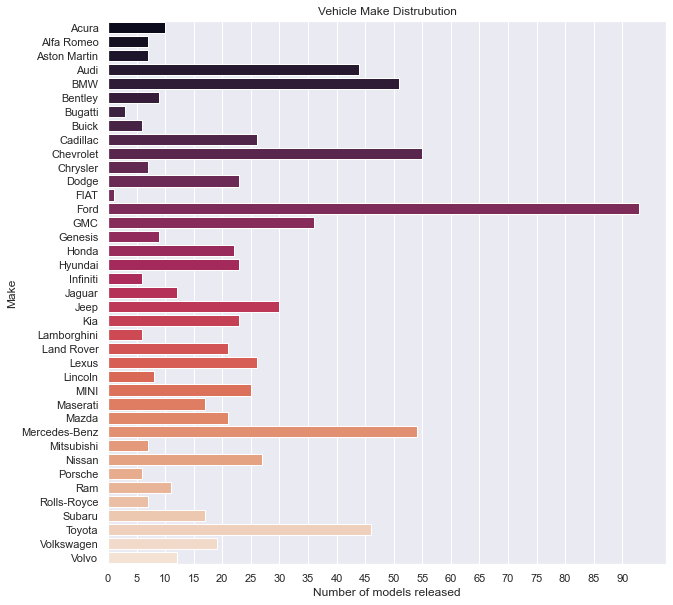

In [8]:
make = fuel_consumption_2023.groupby("Make").size()

# sns.color_palette(palette='tab20b')
sns.set(rc={"figure.figsize": (10, 10)})
graph = sns.barplot(data = pd.DataFrame(make), x=make.values, y=make.index, palette='rocket')
graph.set_xticks(np.arange(0, 95, 5, dtype=int))
graph = graph.set(xlabel="Number of models released", title="Vehicle Make Distrubution")

The companines that created the most cars this year are...
1. Ford - 93
2. Chevrolet - 55
3. Mercedes-Benz - 54
4. BMW - 51
5. Toyota - 46

Meanwhile the distribution of the class of vehicles is shown in the following graph

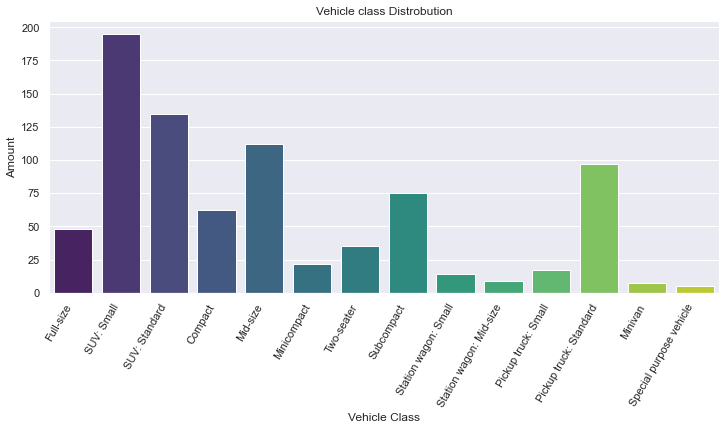

In [9]:
sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.countplot(data= fuel_consumption_2023, x="Vehicle Class", palette="viridis")

x_labels = graph.set_xticklabels(graph.get_xticklabels(), rotation=60, ha="right")
graph = graph.set(title="Vehicle class Distrobution", ylabel="Amount")

The classifications here refer to the following kinds of vehicles,
##### <u>Sedans</u>
sedans use interior spaces to classify them
 - Mid-size: 3.1-3.4 m^3
 - Compact: 2.8-3.0 m^3
 - Subcompact: 2.4-2.8 m^3
 - Microcompact: less than 2.4 m^3
##### <u>Station Wagon</u>
station wagons also use interior spaces to classify them
 - Station Wagon: small: less than 3.7 m^3
 - Station wagon: Mid-size: 3.7-4.5 m^3

##### <u>Pickup Trucks</u>
Pickup Trucks use GVWR (Gross Vehicle Weight Rating), a sum of the weight of the vehicle and its carrying capacity
 - Pickup truck: Small: less than 6,000 lbs
 - Pickup truck Standard: 6,000-8,500 lbs
##### <u>SUV</u>
SUVs also use GVWR
 - SUV: small: less than 6000 lbs
 - SUV standard: 6,000-9,999 lbs

##### <u>Other Kinds</u>
 - full-size: sedans with more than 3.4 m^3 and station wagons with more than 4.5 m^3 of interior space
 - Special purpose Vehicle: have GVWR greater than 8,500 lbs or for others greater than 10,000 lbs
 - Minivan: GVWR less than 8,500 lbs
 - Two-seater: any vehicle designed to hold only two people 

This pie chart demonstrates the total percentage of each type based on the above categories. I decided to group each subclass of vehicle into their major cateories to make further analysis

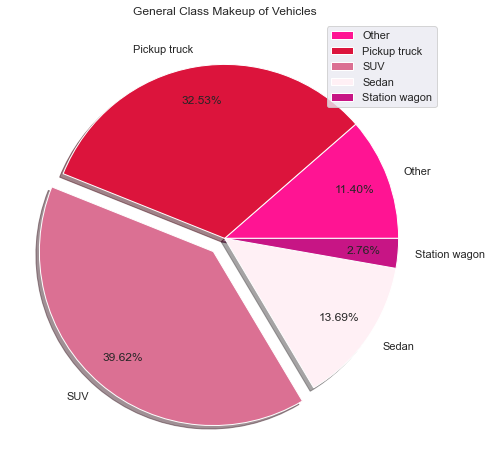

In [32]:
fuel_consumption_2023 = fuel_consumption_2023.replace({"Vehicle Class" : {
                              "SUV: Standard" : "SUV", "SUV: Small" : "SUV", "Pickup truck: Small" : "Pickup truck",
                              "Pickup truck: Standard" : "Pickup truck", "Station wagon: Small" : "Station wagon", "Station wagon: Mid-size" : "Station wagon",
                              "Mid-size" : "Sedan", "Compact" : "Sedan", "Subcompact" : "Sedan", "Minicompact" : "Sedan",
                              "Full-size" : "Other", "Special purpose vehicle" : "Other", "Minivan" : "Other", "Two-seater" : "Other"}})

grouped_class = fuel_consumption_2023.groupby("Vehicle Class").size()

explode = (0, 0, 0.1, 0, 0)
sizes = [grouped_class["Other"]/len(fuel_consumption_2023.index), grouped_class["Sedan"]/len(fuel_consumption_2023.index),
         grouped_class["SUV"]/len(fuel_consumption_2023.index), grouped_class["Pickup truck"]/len(fuel_consumption_2023.index),
         grouped_class["Station wagon"]/len(fuel_consumption_2023.index)]

fig, ax = plt.subplots(figsize= (8, 8))
ax.pie(sizes, labels=grouped_class.index.values, explode=explode, autopct="%1.2f%%", pctdistance=0.8,
       shadow=True, colors=["deeppink", "crimson", "palevioletred", "lavenderblush", "mediumvioletred"])
ax.legend(grouped_class.index.values, loc="upper right")
graph = ax.set_title("General Class Makeup of Vehicles")

### Fuel Consumption and CO2 emissions

The next aspect of the data and the one I was most interested in was the fuel Consumption and CO2 emissions of different vehicles and specifications. That started with gettting a feel for the data by viewing things like min, max and mode.

In [11]:
fuel_consumption_2023.describe()

,Engine Size (Litres),Cylinders,"Fuel Consumption, City (Litres/100km)","Fuel Consumption, Highway (Litres/100km)","Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)","Fuel Consumption, Combination (55% City, 45% Highway, Miles/Gallon)",CO2 Emissions (grams/km),CO2 Rating,Smog Rating
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


From here I started to look more specifically at each column and how differnt categories affected CO2 emissions

#### Check different values affect on CO2 emissions
 1. engine size
 2. cylinders 
 3. transmission
 4. fuel type
 5. Vehicle Class

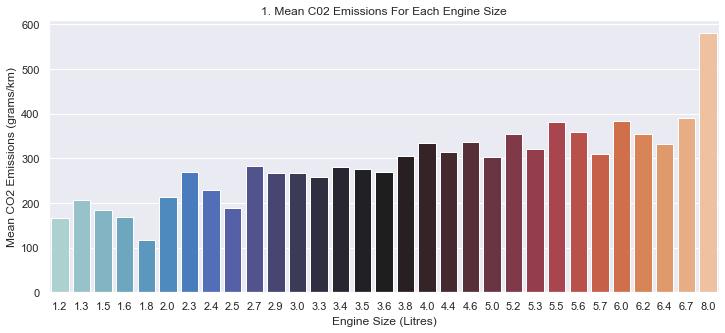

In [36]:
grouped = fuel_consumption_2023.groupby("Engine Size (Litres)").mean()

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="CO2 Emissions (grams/km)",
            palette="icefire"
            ).set(title="1. Mean C02 Emissions For Each Engine Size", ylabel="Mean CO2 Emissions (grams/km)")

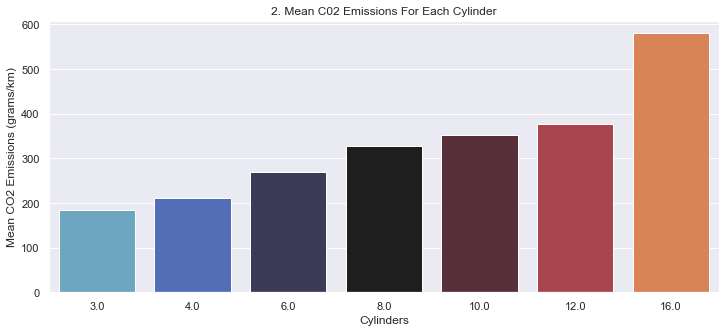

In [35]:
grouped = fuel_consumption_2023.groupby("Cylinders").mean().sort_values("CO2 Emissions (grams/km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="CO2 Emissions (grams/km)",
            palette="icefire"
            ).set(title="2. Mean C02 Emissions For Each Cylinder", ylabel="Mean CO2 Emissions (grams/km)")

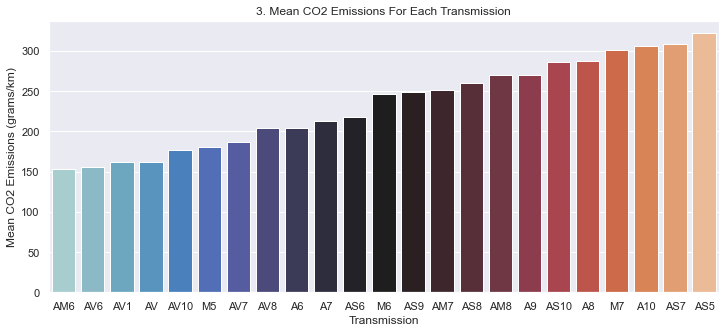

In [14]:
grouped = fuel_consumption_2023.groupby("Transmission").mean().sort_values("CO2 Emissions (grams/km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="CO2 Emissions (grams/km)",
            palette="icefire"
            ).set(title="3. Mean CO2 Emissions For Each Transmission", ylabel="Mean CO2 Emissions (grams/km)")

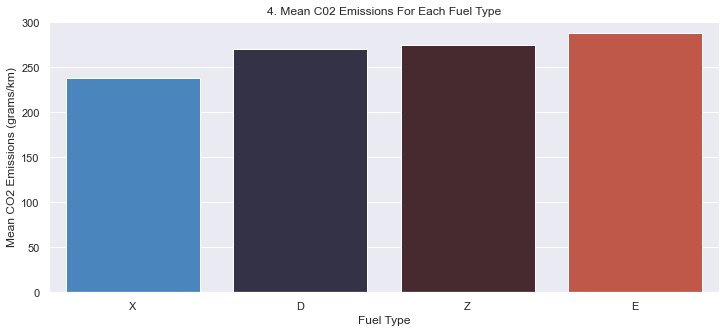

In [33]:
grouped = fuel_consumption_2023.groupby("Fuel Type").mean().sort_values("CO2 Emissions (grams/km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="CO2 Emissions (grams/km)",
            palette="icefire"
            ).set(title="4. Mean C02 Emissions For Each Fuel Type", ylabel="Mean CO2 Emissions (grams/km)")

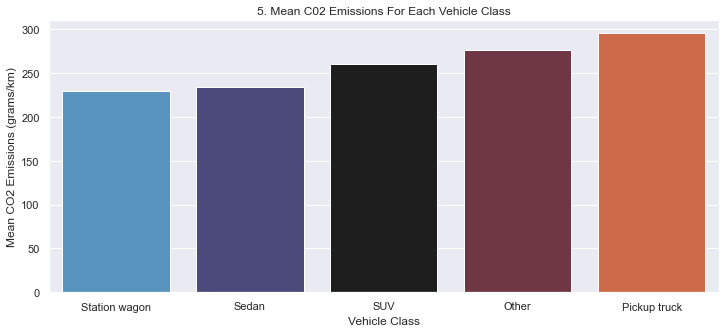

In [34]:
grouped = fuel_consumption_2023.groupby("Vehicle Class").mean().sort_values("CO2 Emissions (grams/km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="CO2 Emissions (grams/km)",
            palette="icefire"
            ).set(title="5. Mean C02 Emissions For Each Vehicle Class", ylabel="Mean CO2 Emissions (grams/km)")

From these graphs we can make the following conclusions
 1. Larger engines emit more CO2 per kilometer
 2. Higher number of cylinders lead to higher CO2 emissions
 3. Vehicles with AS5 (Automatic with Select Shift, 5 gears) emit more CO2
 4. Ethanol fuel produces the most CO2 emissions
 5. Pickup trucks emit the most CO2 on average

I then Repeated this process wih combined fuel Consumption

#### Check different values affect on fuel consumption
 1. engine size
 2. cylinders 
 3. transmission
 4. fuel type
 5. Vehicle Class

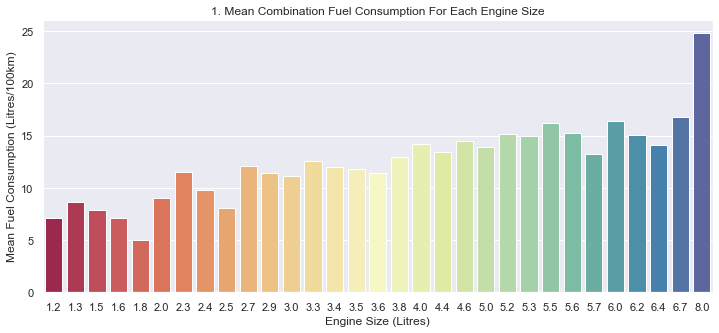

In [17]:
grouped = fuel_consumption_2023.groupby("Engine Size (Litres)").mean()

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped,
            x=grouped.index, 
            y="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
            palette="Spectral"
            ).set(title="1. Mean Combination Fuel Consumption For Each Engine Size", ylabel="Mean Fuel Consumption (Litres/100km)")

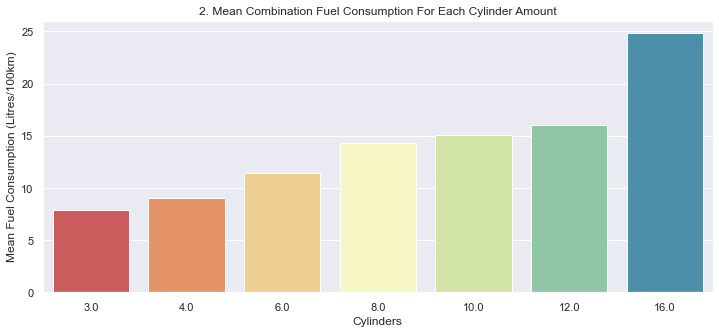

In [18]:
grouped = fuel_consumption_2023.groupby("Cylinders").mean().sort_values("Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
            palette="Spectral"
            ).set(title="2. Mean Combination Fuel Consumption For Each Cylinder Amount", ylabel="Mean Fuel Consumption (Litres/100km)")

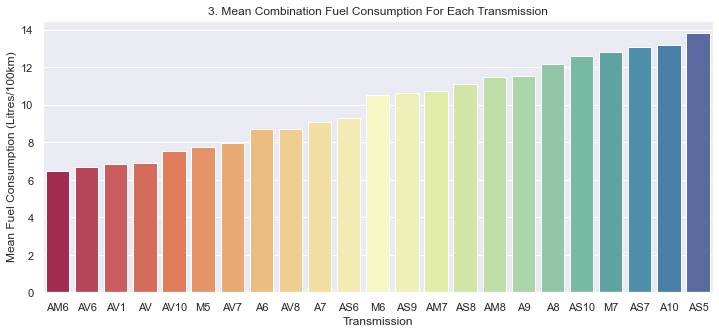

In [19]:
grouped = fuel_consumption_2023.groupby("Transmission").mean().sort_values("Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
            palette="Spectral"
            ).set(title="3. Mean Combination Fuel Consumption For Each Transmission", ylabel="Mean Fuel Consumption (Litres/100km)")


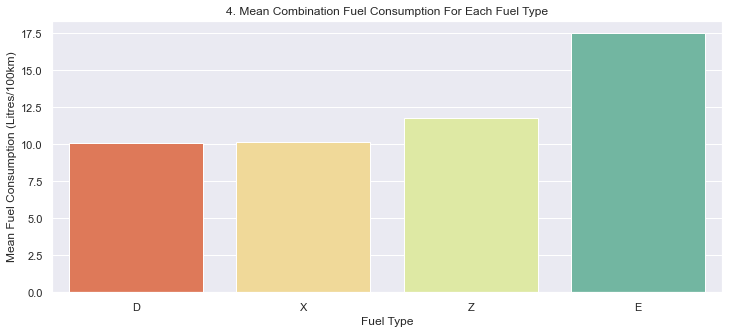

In [20]:
grouped = fuel_consumption_2023.groupby("Fuel Type").mean().sort_values("Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
            palette="Spectral"
            ).set(title="4. Mean Combination Fuel Consumption For Each Fuel Type", ylabel="Mean Fuel Consumption (Litres/100km)")

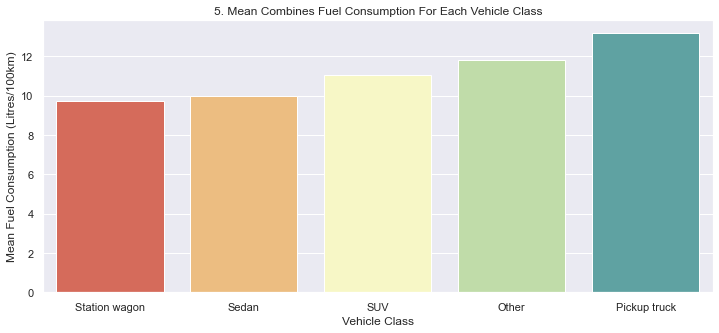

In [21]:
grouped = fuel_consumption_2023.groupby("Vehicle Class").mean().sort_values("Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)")

sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.barplot(data=grouped, 
            x=grouped.index, 
            y="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
            palette="Spectral"
            ).set(title="5. Mean Combines Fuel Consumption For Each Vehicle Class", ylabel="Mean Fuel Consumption (Litres/100km)")

From these graphs we can make the following conclusions
 1. Larger engines consume more fuel
 2. Higher number of cylinders lead to higher fuel consumption
 3. Vehicles with AS5 (Automatic with Select Shift, 5 gears) use more fuel
 4. Ethanol is the least efficent fuel
 5. Pickup trucks are the most fuel inefficient

### Breakdown of Vehicle Specifications by Class
From the graphs in the previous sections in regards to each category the worst in each was...
 - Worst Fuel Type: Ethanol
 - Worst Vehicle Class: Pickup truck
 - Worst Engine Size: 16 litres
 - Worst Transmission: AS5
 - Worst Number of Cylinders: 8

While the best in each category was...
 - Best Fuel for CO2 Emissions: Regular gasoline
 - Best Fuel for Fuel Consumption: Disel
 - Best Vehicle class: Station Wagon
 - Best engine size: 1.2
 - Best Transmission: AM6
 - Best number of cylinders: 3

From Here I wanted to see how common each specification was among each class

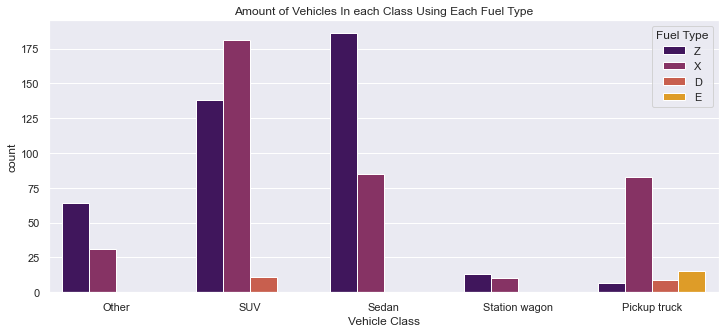

In [22]:
sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.countplot(data=fuel_consumption_2023, x="Vehicle Class", hue="Fuel Type", palette="inferno").set_title("Amount of Vehicles In each Class Using Each Fuel Type")

More Vehicles in the Other, Sedan and Station Wagon classes use premium gasoline while a greater number SUVs and Pickup trucks use regular gasoline. SUVs and Pickup trucks are the only classes that use diesel and Pickup trucks are the only ones that use ethanol

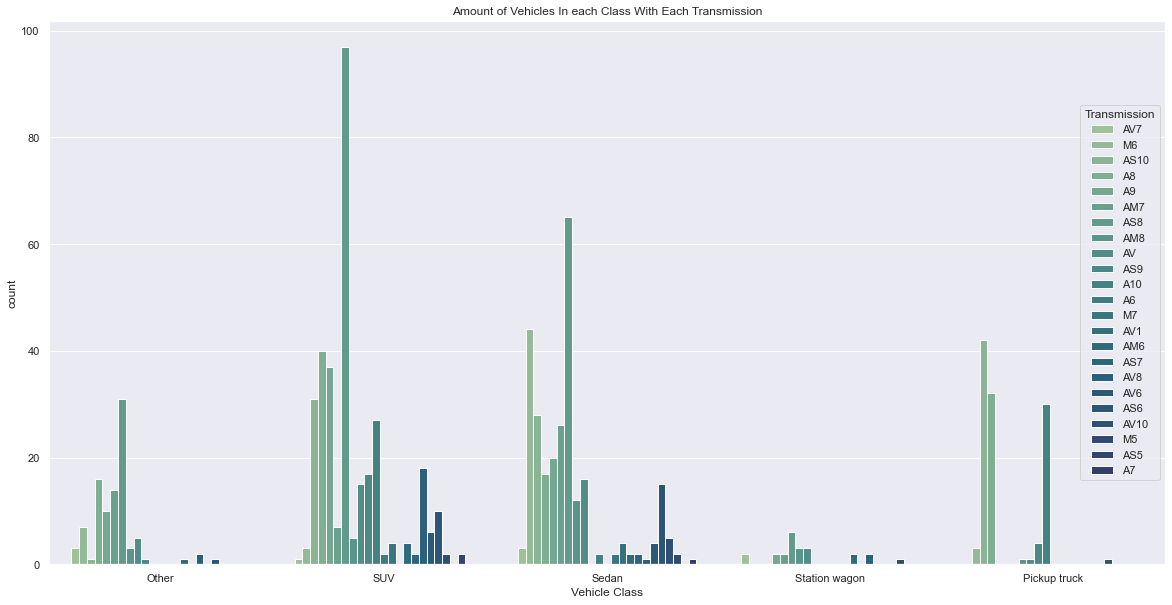

In [23]:
sns.set(rc={"figure.figsize": (20, 10)})
graph = sns.countplot(data=fuel_consumption_2023, x="Vehicle Class", hue="Transmission", palette="crest")
sns.move_legend(graph, "right")
graph = graph.set_title("Amount of Vehicles In each Class With Each Transmission")

The top three Transmissions for each vehicle class

Other:
 1. AS8
 2. A8
 3. AM7

SUV:
 1. AS8
 2. A8
 3. AM7

Sedan:
 1. AS8
 2. M6
 3. AS10

Station Wagon:
 1. AS8
 2. AV
 3. AM8

Other:
 1. AS10
 2. A8
 3. A10

Overal the most common transmissions are...
 1. AS8
 2. A8
 3. AS10

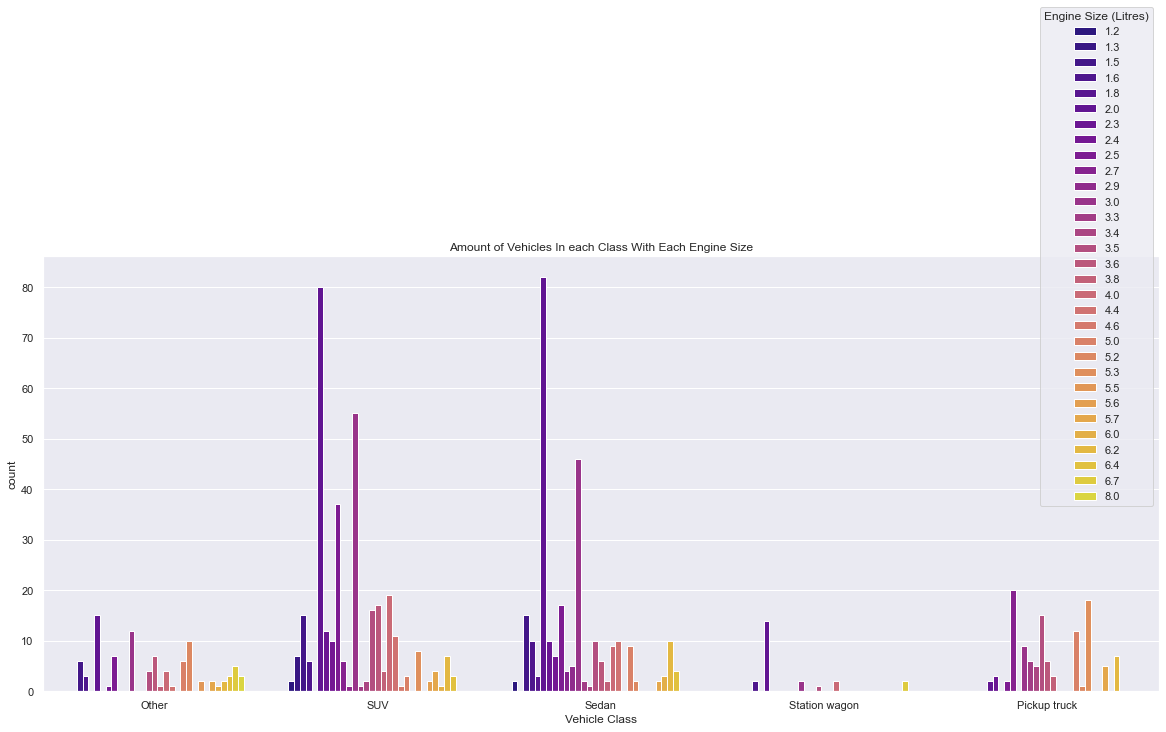

In [24]:
sns.set(rc={"figure.figsize": (20, 8)})
graph = sns.countplot(data=fuel_consumption_2023, x="Vehicle Class", hue="Engine Size (Litres)", palette="plasma")
sns.move_legend(graph, "right", bbox_to_anchor=(1, 1))
graph = graph.set_title("Amount of Vehicles In each Class With Each Engine Size")

The top three Engine Sizes for each vehicle class

Other:
 1. 3.0 L
 2. 2.0 L
 3. 5.2 L

SUV:
 1. 2.0 L
 2. 3.0 L
 3. 3.5 L

Sedan:
 1. 2.0 L
 2. 3.0 L
 3. 2.5 L

Station Wagon:
 1. 2.0 L
 2. Tie between 6.7 L, 1.6 L, 3.0 L, 4.0 L
 3. 3.5 L

Pickup Truck:
 1. 2.7 L
 2. 5.3 L
 3. 3.5 L

Overal the most common transmissions are...
 1. 2.0 L
 2. 3.0 L
 3. 2.5 L

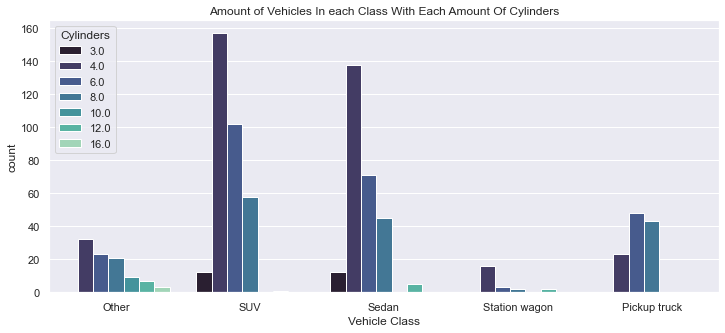

In [25]:
sns.set(rc={"figure.figsize": (12, 5)})
graph = sns.countplot(data=fuel_consumption_2023, x="Vehicle Class", hue="Cylinders", palette="mako").set_title("Amount of Vehicles In each Class With Each Amount Of Cylinders")

For every class other than Pickup trucks, the trend with amount of cylinders is prety consistant, 4 cylinder engines are the most common, followed by 6 and 8 Cylinder engines making smaller portions but still being sizable amounts. For Pickup trucks however 6 and 8 cylinder engines are the more common kind and 4.0 Cylinder are the least.

Based on the graphs from this section it can be observed that most of the vehicles in the data set have characteristics that are both good and bad for fuel consumption and CO2 emissions. The majority of vehicle had engine sizes and cylinder counts that also have low fuel consumption and CO2 Emissions, while their fuel types and transmissions tended to be worse for fuel consumption and CO2 Emissions

### Focusing on Vehicle Class

Based on the finding from the last section I decided to take a broader look at the difference between each vehicle class in each performance field.

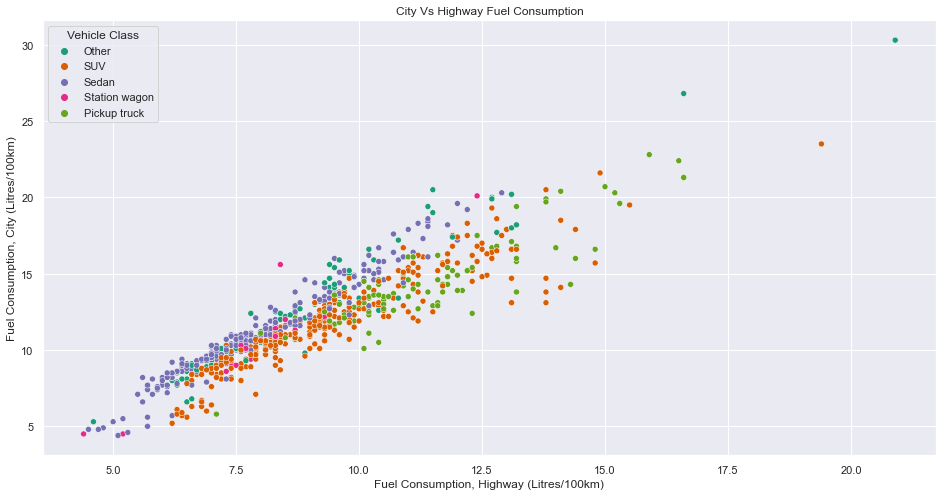

In [40]:
fig, ax = plt.subplots(figsize= (16, 8))
graph = sns.scatterplot(data=fuel_consumption_2023, x="Fuel Consumption, Highway (Litres/100km)",
                y="Fuel Consumption, City (Litres/100km)", hue="Vehicle Class", palette="Dark2").set_title("City Vs Highway Fuel Consumption")

Comparing city and highway fuel consumption for all classes of vehicles shows that sedans have cossitantly better highway performance in highway fuel consumption and seem to be on par with most SUVs. Stations wagons are too lacking in data points to say anything concrete, but do seem to perform well in both categories, they do also coincidentally have the most fuel effiecnt vehicle. Pickup trucks perform rather poorly, with many of them having bad highway fuel consumption and okay to bad city fuel consumption. Other vehicles despite having the largest and heaviest types of vehicles does overall do better than Pickup trucks, though they do have the most fuel inefficent vehicle as well.

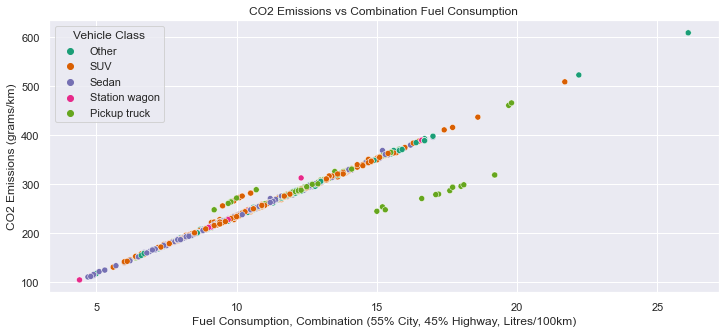

In [27]:
graph = sns.scatterplot(data = fuel_consumption_2023, x="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
                y="CO2 Emissions (grams/km)", hue="Vehicle Class", palette="Dark2").set(title="CO2 Emissions vs Combination Fuel Consumption")

This graph is pretty straighforward, the worse a vehicle's fuel consumption is the more CO2 emissions it produces. This makes sense as using more fuel creates more CO2 emissions. As the the CO2 emissions measurement is based on combined fuel consumption this fits the data,

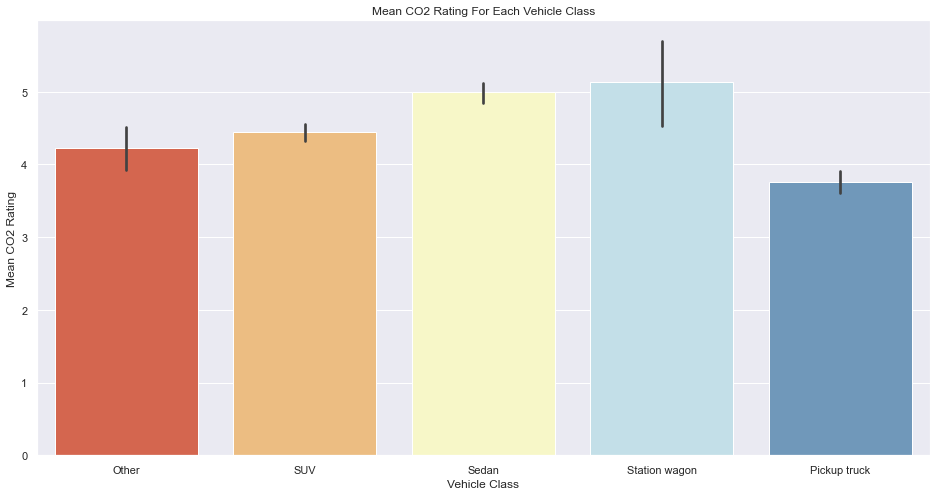

In [41]:
fig, ax = plt.subplots(figsize= (16, 8))
graph = sns.barplot(data = fuel_consumption_2023, x="Vehicle Class",
                y="CO2 Rating", palette="RdYlBu").set(title="Mean CO2 Rating For Each Vehicle Class", ylabel="Mean CO2 Rating")

Looking at CO2 rating (1 being worst and 10 being best) we see middling results. The average CO2 rating among each vehicle class is either at or bellow 5, meaning that as a whole 2023 car models underperforms in terms of CO2 emissions. Aside from we can see that stations wagons ans sedans are about even and have higher ratings, while Pick up trucks perform noticalbley worse than the other classes.

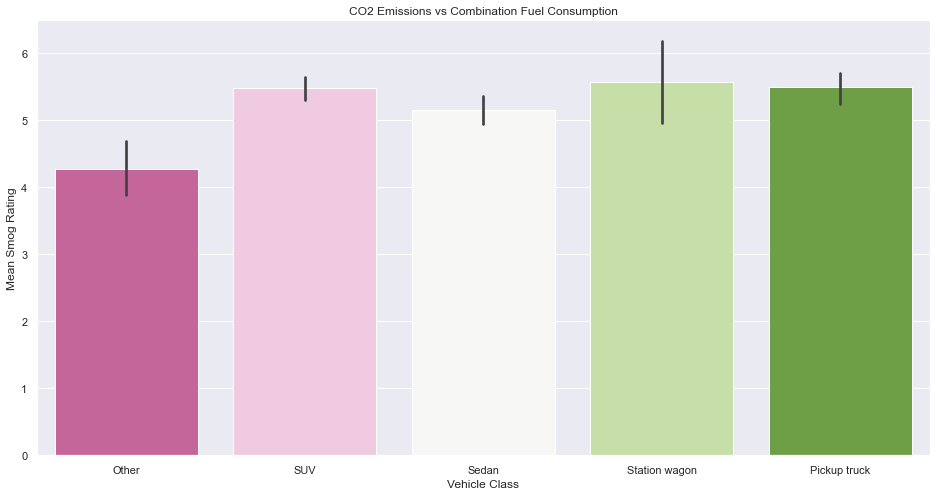

In [42]:
fig, ax = plt.subplots(figsize= (16, 8))
graph = sns.barplot(data = fuel_consumption_2023, x="Vehicle Class",
                y="Smog Rating", palette="PiYG").set(title="CO2 Emissions vs Combination Fuel Consumption", ylabel="Mean Smog Rating")

Meanwhile Smog Ratings are overall better with all but one class making it past a mean Smog Rating of 5. Station wagons once again take the lead, but Pickup trucks and SUVs do better in this category while Sedans fall behind. The other category does poorly here, this makes sense as the largest vehicles as well as many high performing sports cats are in this category.

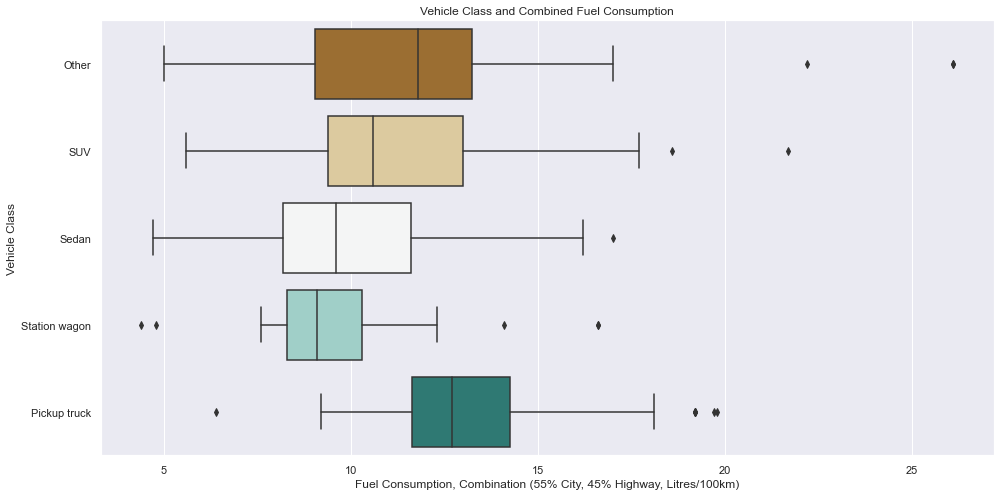

In [30]:
fig, ax = plt.subplots(figsize= (16, 8))
graph = sns.boxplot(data=fuel_consumption_2023,
                    x="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
                    # x="Fuel Consumption, Combination (55% City, 45% Highway, Litres/100km)",
                    y="Vehicle Class", palette="BrBG").set_title("Vehicle Class and Combined Fuel Consumption")

This box plot helps us better visualize how each class varries in combined fuel consumption.

Other:
Have a low min of 5 L/100km and a better max than Pickup trucks and SUVs but worse than Sedans and station wagons. The median value is on the higher end of interquartile range but the data is also negatively skewed, meaning more of them tend to have higer fuel consumption. The ouliers here are quite extreme, most likely they are some kind of high performance sports car.

SUV:
Have a better min value then station wagons and Pickup Trucks but a worse max than Other and Sedans. The median value is on the lower end of the interquartile range meaning the data is positively skewed, so more SUVs tend to have lower Fuel Consumption. The outliers are less extremse than in the Other category, but it is interesting that the worst performing SUV is worse the wost Pickup truck.

Sedans:
Have a min value better than every other class and a max that is only higher than station wagons. The median value is on the lower end of the interquartile range meaning the data is positively skewed, so more Sedans tend to have lower fuel consumption. the outliers in the data are not to extreme either.

Station wagons:
Station wagons have a min value that is worse than all other categories expect Pickup trucks, but also have the best max value out of all categories. The median value is on the lower end of the interquartile range meaning the data is positiavely skewed, so most Station wagons have lower fuel consumption. The outliers in the station wagon category are intersting because they have the best fuel consumption in the data set on the lower end and on the higher end are for the most part not to bad in terms of fuel consumption.

Pickup Trucks:
Have the worst min value out of all other classes and worst max value as well. The median line is on the lower end of the interquatile range meaning that the data is positively skewed, so more Pickup tucks have lower fuel consumption. The outliers are normal for the most part but it was supring to see a pickup truck with such a low fuel consumption when compared to the others.

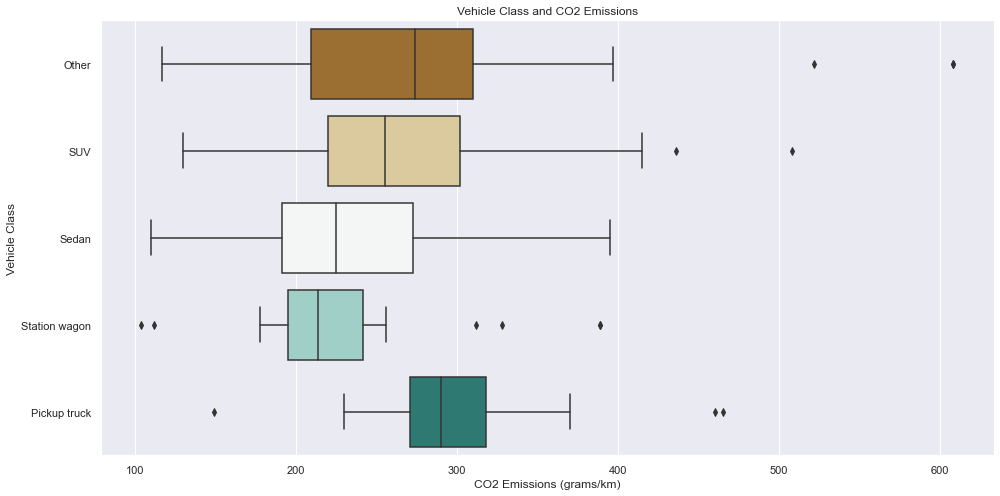

In [31]:
fig, ax = plt.subplots(figsize= (16, 8))
graph = sns.boxplot(data=fuel_consumption_2023, x="CO2 Emissions (grams/km)",
                    y="Vehicle Class", palette="BrBG").set(title="Vehicle Class and CO2 Emissions")

When comaparing CO2 emissions among the vehicle classes we see a similar pattern as with fuel consumption. the only major change is that Pickup truks no longer have the worst max value and instead SUvs emit the most CO2.

## *Discussion*

In conclusion from the data analysis conducted we can come to the following conclusions about vehicle attributes
 - Smaller engines consume less fuel and produce less CO2, while large engines use more fuel and emit more CO2
 - Higher cylinder counts lead to higher CO2 emissions and fuel consumption while lower counts are more fuel efficent anf emit less CO2
 - Regular gasoline is better for fuel effiency and CO2 emissions while ehtanol gas is worse
 - vehicles with AM5 transmission produce less CO2 and consume less fuel while vehicles with AS6 transimission produce more CO2 and use more fuel

When it comes to Vehicle class, the trend favoured smaller vehicles, like sedans and station wagons, for fuel consumption and CO2 emissions while bigger vehicles, like SUVs and Pickup trucks, performed worse in these categories. This makes sense as smaller vehicles can use smaller engines with less cylinders while bigger vehicles need bigger engines and more cylinders to reach similar performance.

From these finding we can see that vehicle class was one of the largest factors in fuel consumption and CO2 emissions. So if we want to reduce fuel consumption and CO2 emissions from personal motor transit we should shift from manufacturing large vehicles and move towards smaller lighter vehicles. SUVs being the most prevalent class makes sense as they  are commonly used by families, due to their large cargo capacity and higher number of seats. this is an issue as they are shown to have poor fuel consumption and high CO2 emission and they also made up the largest portion of vehciles manufactured this year. So shifting away from SUVs as the main family vehicle class and moving to another, could help. Station wagons could perhaps be a good substitute as they share many of the same benefits of SUVs (large cargo capacity and can have additional seats), but the amount of station wagons in the data set is to small to say for sure.

## *Refrences*

https://www.fueleconomy.gov/feg/info.shtml#sizeclasses - For Vehicle Class info

https://commons.wikimedia.org/wiki/File:Traffic_in_rachaprasong.jpg - Image link

https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/b6100f60-5e63-437d-b122-db76c467c0a7 - for data set

https://www.statista.com/statistics/1185535/transport-carbon-dioxide-emissions-breakdown/ - For statistic in the introduction

seaborn for data visualization

matplotlib for data visualization

pandas for data manipulation
